# 📊 Informe de Consultoría: Optimización de Alura Store
### Analista: Bernardo Adolfo Gómez Montoya

#### introducción:

Este informe presenta un análisis multidimensional de las sucursales de Alura Store. Se evalúan métricas de facturación, satisfacción del cliente y eficiencia logística. El flujo de trabajo sigue una metodología de Ciencia de Datos: Limpieza, Exploración, Análisis de KPIs y Visualización Estratégica.

Objetivo: Analizar el desempeño de las cuatro sucursales de Alura Store para identificar la tienda con menor eficiencia operativa. Este análisis servirá como base para que el Sr. Juan tome una decisión estratégica sobre la venta de una unidad de negocio para financiar un nuevo emprendimiento.


# 1. Configuración y Carga de Datos
Se realiza la conexión con las fuentes de datos alojadas en el repositorio oficial. Se ha verificado la integridad de las URLs para asegurar una carga limpia sin modificar los archivos CSV originales.

In [ ]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

In [24]:
# Resetear cualquier configuración de formato previa para evitar errores
import pandas as pd
pd.reset_option('display.float_format')

# 2. Análisis Exploratorio de Datos (EDA)
Antes del procesamiento, realizamos una inspección técnica para validar la calidad de la información. Este paso es crucial para asegurar que no existan valores nulos o tipos de datos erróneos que puedan sesgar los resultados financieros.

Hallazgos Clave:

Integridad: 9,435 registros validados sin valores faltantes.

Consistencia: Las columnas de precio, envío y calificación presentan formatos numéricos correctos, permitiendo cálculos estadísticos precisos.

In [6]:
# Unificamos los datos en un solo DataFrame para un análisis global inicial
df_global = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# 1. Inspección de tipos de datos y valores nulos
print("--- Estructura General del Dataset ---")
df_global.info()

# 2. Verificación de nulos
print("\n--- Conteo de Valores Nulos ---")
print(df_global.isnull().sum())

# 3. Vista rápida de los datos
print("\n--- Primeros registros ---")
display(df_global.head())

--- Estructura General del Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 884.7+ KB

--- Conteo de Valores Nulos ---
Producto       

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#3. Análisis de facturación
Calculamos la capacidad de generación de ingresos brutos de cada sucursal. Para una visualización profesional, se omite la notación científica y se utiliza formato de moneda local. Este indicador es el primer criterio de volumen de negocio.



In [25]:
# Cálculo
resumen_facturacion = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Facturación Total': [tienda1['Precio'].sum(), tienda2['Precio'].sum(),
                          tienda3['Precio'].sum(), tienda4['Precio'].sum()]
}).sort_values(by='Facturación Total', ascending=False)

# Visualización Profesional (Sin notación científica)
print("💰 REPORTE DE FACTURACIÓN TOTAL")
display(resumen_facturacion.style.format({'Facturación Total': '${:,.0f}'}))

💰 REPORTE DE FACTURACIÓN TOTAL


,Tienda,Facturación Total
0,Tienda 1,"$1,150,880,400"
1,Tienda 2,"$1,116,343,500"
2,Tienda 3,"$1,098,019,600"
3,Tienda 4,"$1,038,375,700"


## Explicación del código:
Suma por columna: Se utiliza la función .sum() sobre la columna 'Precio' de cada una de las tiendas (tienda1, tienda2, etc.). Esto permite calcular el valor monetario total de las ventas por sucursal, transformando miles de registros individuales en un dato financiero clave.

Estructura de Tabla: Al crear el DataFrame resumen_facturacion, organizamos los resultados en una sola tabla comparativa. Esto es fundamental para dejar de trabajar con variables sueltas y tener una estructura que permita jerarquizar las tiendas.

Formato de Moneda Profesional: En la última línea de tu código, se utiliza .style.format. Esta instrucción es la que permite añadir el signo de pesos ($) y los separadores de miles. Su función principal aquí es eliminar la "notación científica" (esos números con e+09) para que el Sr. Juan pueda leer los montos como dinero real.

Ordenamiento: Se aplica el método .sort_values con el parámetro ascending=False. Esto coloca automáticamente la tienda con mayores ingresos al principio de la tabla, facilitando la identificación visual de la sucursal con menor desempeño financiero al final de la lista.

# 4. Ventas por categoría


Analizamos el mix de productos de cada tienda. Identificar las categorías dominantes (como Muebles y Electrónicos) nos permite entender si el comportamiento de compra es uniforme en todas las sedes o si alguna sucursal tiene una especialización nicho.

In [12]:
# 1. Creamos una lista con las tiendas para procesarlas de forma organizada
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
datasets = [tienda1, tienda2, tienda3, tienda4]

print("📊 VENTAS POR CATEGORÍA (Top 3 por tienda):")
print("-" * 40)

# 2. Iteramos por cada tienda para obtener sus categorías más vendidas
for i in range(len(datasets)):
    print(f"\n📍 {nombres_tiendas[i]}:")
    # value_counts() cuenta cuántos productos hay por cada categoría
    top_categorias = datasets[i]['Categoría del Producto'].value_counts().head(3)

    # Lo mostramos de forma limpia
    for cat, total in top_categorias.items():
        print(f"- {cat}: {total} unidades")

📊 VENTAS POR CATEGORÍA (Top 3 por tienda):
----------------------------------------

📍 Tienda 1:
- Muebles: 465 unidades
- Electrónicos: 448 unidades
- Juguetes: 324 unidades

📍 Tienda 2:
- Muebles: 442 unidades
- Electrónicos: 422 unidades
- Juguetes: 313 unidades

📍 Tienda 3:
- Muebles: 499 unidades
- Electrónicos: 451 unidades
- Juguetes: 315 unidades

📍 Tienda 4:
- Muebles: 480 unidades
- Electrónicos: 451 unidades
- Juguetes: 338 unidades


## Explicación del código
Función personalizada (obtener_ventas_categoria): Se define una función para automatizar y estandarizar el análisis en las cuatro tiendas. Esto asegura que el procesamiento sea idéntico para cada dataset, mejorando la eficiencia y limpieza del código.

Conteo de frecuencias (value_counts): Dentro de la función, se utiliza este método para contabilizar cuántas veces aparece cada categoría de producto. Este es el paso clave para transformar datos cualitativos en métricas cuantitativas de volumen de ventas.

Transformación a DataFrame: Se aplica .reset_index() y se renombran las columnas para convertir el resultado del conteo en una tabla organizada con nombres claros: "Categoría" y "Cantidad Vendida".

Consolidación Comparativa: Mediante pd.concat y el método .head(3), se extraen y agrupan únicamente los tres segmentos líderes de cada sucursal en un solo reporte maestro llamado resumen_categorias.

Ordenamiento y Visualización: Se utiliza .sort_values para organizar los resultados por tienda y cantidad vendida de forma descendente. Esto permite visualizar de inmediato si existe una especialización de productos en alguna sede o si el comportamiento de compra es uniforme en toda la cadena.

# 5. Calificación promedio de la tienda


El éxito de una tienda no se mide solo en dinero, sino en la lealtad del cliente. Utilizamos la Calificación Promedio como un indicador de calidad de servicio. Este dato es vital como factor de desempate: una tienda que vende mucho pero tiene bajas notas es un riesgo reputacional.

In [26]:
# Cálculo
resumen_calif = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificación Promedio': [tienda1['Calificación'].mean(), tienda2['Calificación'].mean(),
                              tienda3['Calificación'].mean(), tienda4['Calificación'].mean()]
}).sort_values(by='Calificación Promedio', ascending=False)

# Visualización (Aquí la calificación se ve como número normal con 2 decimales)
print("⭐ SATISFACCIÓN DEL CLIENTE")
display(resumen_calif.style.format({'Calificación Promedio': '{:.2f}'}))

⭐ SATISFACCIÓN DEL CLIENTE


,Tienda,Calificación Promedio
2,Tienda 3,4.05
1,Tienda 2,4.04
3,Tienda 4,4.00
0,Tienda 1,3.98


## Explicación del código
Cálculo del Promedio (.mean()): Se utiliza la función .mean() sobre la columna 'Calificación'. A diferencia de la suma, esta métrica nos entrega el promedio aritmético de las valoraciones de los clientes (en una escala de 1 a 5), permitiendo medir el nivel de satisfacción en cada sucursal.

Estructura de Tabla: Los resultados se consolidan en el DataFrame resumen_calif. Esto nos permite comparar de forma directa el "NPS" (Net Promoter Score) simplificado de cada tienda y observar quién tiene la mejor reputación.

Formato de Visualización: En la visualización utilizamos .style.format para mostrar la calificación con solo dos decimales ({:.2f}). Es fundamental notar que aquí NO usamos el signo de pesos, ya que estamos midiendo estrellas de satisfacción y no dinero, manteniendo la coherencia visual del reporte.

Ranking de Satisfacción: El método .sort_values con ascending=False organiza la tabla para mostrar en la parte superior a la tienda que "mejor se porta" con sus clientes. Esto nos da un criterio de decisión clave: si una tienda factura mucho pero tiene notas bajas, es un riesgo para la marca.

# 6. Productos más y menos vendidos

## Análisis de Rotación de Inventario
Identificamos los productos "Estrella" (mayor demanda) y los productos de baja rotación. Una tienda eficiente debe mantener un equilibrio; una alta concentración de productos poco vendidos indica inventario estancado.

In [14]:
# 1. Definimos una función para identificar los extremos de ventas
def analizar_productos(df_tienda, nombre_tienda):
    # Contamos cuántas veces se vendió cada producto
    conteo_productos = df_tienda['Producto'].value_counts()

    # Obtenemos los 3 más vendidos y los 3 menos vendidos
    mas_vendidos = conteo_productos.head(3)
    menos_vendidos = conteo_productos.tail(3)

    print(f"--- 📍 ANÁLISIS DE PRODUCTOS: {nombre_tienda} ---")
    print("✅ Más vendidos:")
    for prod, cant in mas_vendidos.items():
        print(f"   - {prod}: {cant} unidades")

    print("❌ Menos vendidos:")
    for prod, cant in menos_vendidos.items():
        print(f"   - {prod}: {cant} unidades")
    print("-" * 40)

# 2. Ejecutamos el análisis para las 4 tiendas
analizar_productos(tienda1, "Tienda 1")
analizar_productos(tienda2, "Tienda 2")
analizar_productos(tienda3, "Tienda 3")
analizar_productos(tienda4, "Tienda 4")

--- 📍 ANÁLISIS DE PRODUCTOS: Tienda 1 ---
✅ Más vendidos:
   - Microondas: 60 unidades
   - TV LED UHD 4K: 60 unidades
   - Armario: 60 unidades
❌ Menos vendidos:
   - Olla de presión: 35 unidades
   - Auriculares con micrófono: 33 unidades
   - Celular ABXY: 33 unidades
----------------------------------------
--- 📍 ANÁLISIS DE PRODUCTOS: Tienda 2 ---
✅ Más vendidos:
   - Iniciando en programación: 65 unidades
   - Microondas: 62 unidades
   - Batería: 61 unidades
❌ Menos vendidos:
   - Mesa de comedor: 34 unidades
   - Impresora: 34 unidades
   - Juego de mesa: 32 unidades
----------------------------------------
--- 📍 ANÁLISIS DE PRODUCTOS: Tienda 3 ---
✅ Más vendidos:
   - Kit de bancas: 57 unidades
   - Mesa de comedor: 56 unidades
   - Cama king: 56 unidades
❌ Menos vendidos:
   - Mochila: 36 unidades
   - Microondas: 36 unidades
   - Bloques de construcción: 35 unidades
----------------------------------------
--- 📍 ANÁLISIS DE PRODUCTOS: Tienda 4 ---
✅ Más vendidos:
   - Cama b

## Explicación del código

Función de Análisis (analizar_productos): Se crea una función personalizada para procesar de manera uniforme los datasets de las cuatro tiendas. Esto evita la repetición de código y asegura que los criterios para identificar los productos líderes y rezagados sean los mismos en toda la organización.

Conteo de Unidades (value_counts): Se aplica este método sobre la columna 'Producto' para determinar la frecuencia de venta de cada artículo individual. Esto nos permite pasar de una lista de transacciones a un ranking de popularidad por SKU (referencia de producto).

Identificación de Extremos (head y tail): Utilizamos .head(3) para capturar los 3 productos con mayor rotación (los más vendidos) y .tail(3) para detectar los 3 productos con menor salida (los menos vendidos o "huesos").

Iteración y Formateo: Mediante un bucle for y el método .items(), recorremos los resultados para generar una salida de texto limpia y fácil de leer. Esto permite que el Sr. Juan identifique por nombre cuáles son los artículos que están impulsando el negocio y cuáles podrían estar generando inventario estancado.

# 7. Envío promedio por tienda

# Eficiencia Logística y Costos de Envío

Dado que el costo de envío es asumido por el cliente, este valor representa una barrera de entrada. Evaluamos si alguna tienda está perdiendo competitividad debido a costos logísticos superiores al promedio de la cadena.

In [27]:
# Cálculo
resumen_envio = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Envío Promedio': [tienda1['Costo de envío'].mean(), tienda2['Costo de envío'].mean(),
                       tienda3['Costo de envío'].mean(), tienda4['Costo de envío'].mean()]
}).sort_values(by='Envío Promedio', ascending=True) # Menor costo es mejor

# Visualización
print("📦 COSTOS LOGÍSTICOS PROMEDIO")
display(resumen_envio.style.format({'Envío Promedio': '${:,.2f}'}))

📦 COSTOS LOGÍSTICOS PROMEDIO


,Tienda,Envío Promedio
3,Tienda 4,"$23,459.46"
2,Tienda 3,"$24,805.68"
1,Tienda 2,"$25,216.24"
0,Tienda 1,"$26,018.61"


## Explicación del código
Cálculo del Promedio (.mean()): Se aplica la función .mean() sobre la columna 'Costo de envío' de cada tienda. Este cálculo es fundamental para determinar el impacto logístico por cada venta realizada, permitiendo evaluar la eficiencia de distribución de cada sucursal.

Estructura de Tabla: Los resultados se consolidan en el DataFrame resumen_envio. Esta estructura permite comparar de manera directa cómo varían los costos de transporte entre una sede y otra, unificando datos que antes estaban dispersos.

Formato Profesional: En la visualización se utiliza .style.format para mostrar los valores con el signo de pesos ($) y dos decimales. Esto garantiza que el Sr. Juan vea cifras monetarias claras y elimina cualquier riesgo de que aparezcan números en notación científica (como 2.4e+04).

Ordenamiento Estratégico: Se utiliza el método .sort_values con el parámetro ascending=True. A diferencia de las ventas, en los costos nos interesa ver primero los valores más bajos (los más eficientes). Esto permite identificar rápidamente qué tienda tiene el envío más caro y si esto influye en su bajo volumen de ventas.



# 8. Matriz de Decisión

## Resumen Integral para la Toma de Decisiones
 ### Matriz de Decisión Estratégica

Consolidamos todas las métricas en un tablero de control único. Aplicamos formatos visuales para resaltar automáticamente las fortalezas (en verde) y las debilidades (en rojo), facilitando la interpretación inmediata para la gerencia.

In [29]:
# Unificamos todo en una sola vista para comparar
df_final = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Facturación': [tienda1['Precio'].sum(), tienda2['Precio'].sum(),
                     tienda3['Precio'].sum(), tienda4['Precio'].sum()],
    'Satisfacción': [tienda1['Calificación'].mean(), tienda2['Calificación'].mean(),
                     tienda3['Calificación'].mean(), tienda4['Calificación'].mean()],
    'Costo Envío': [tienda1['Costo de envío'].mean(), tienda2['Costo de envío'].mean(),
                    tienda3['Costo de envío'].mean(), tienda4['Costo de envío'].mean()]
})

# Formato de "Gala" para la presentación final
print("🏆 RESUMEN EJECUTIVO PARA LA TOMA DE DECISIONES")
display(df_final.style.format({
    'Facturación': '${:,.0f}',
    'Satisfacción': '{:.2f} ⭐',
    'Costo Envío': '${:,.2f}'
}).highlight_min(subset=['Facturación'], color='#ff9999') # Resalta en rojo la tienda que menos vende
  .highlight_max(subset=['Satisfacción'], color='#99ff99')) # Resalta en verde la mejor calificada

🏆 RESUMEN EJECUTIVO PARA LA TOMA DE DECISIONES


,Tienda,Facturación,Satisfacción,Costo Envío
0,Tienda 1,"$1,150,880,400",3.98 ⭐,"$26,018.61"
1,Tienda 2,"$1,116,343,500",4.04 ⭐,"$25,216.24"
2,Tienda 3,"$1,098,019,600",4.05 ⭐,"$24,805.68"
3,Tienda 4,"$1,038,375,700",4.00 ⭐,"$23,459.46"


## Explicación del código

Consolidación de Métricas (df_final): Se crea un DataFrame maestro que unifica los resultados de los análisis previos: Facturación (ventas), Satisfacción (estrellas) y Costo de Envío (logística). Esto permite pasar de datos aislados a una visión de 360 grados sobre el desempeño de cada sucursal.

Formato de Presentación Profesional: Se utiliza nuevamente .style.format para asegurar que cada columna tenga la unidad de medida correcta. La facturación y el envío se muestran con el signo de pesos ($), mientras que la satisfacción se acompaña de un icono de estrella (⭐), eliminando cualquier rastro de notación científica.

Resaltado de Debilidades (highlight_min): Se aplica un formato condicional de color rojo (#ff9999) sobre la columna de Facturación para señalar automáticamente la tienda con menores ingresos. Esto permite al Sr. Juan identificar el punto crítico de la operación de forma inmediata.

Resaltado de Fortalezas (highlight_max): Se utiliza el color verde (#99ff99) para destacar la tienda con la calificación más alta. Este contraste visual es fundamental para entender que la tienda que menos vende no siempre es la que peor servicio ofrece, ayudando a equilibrar la decisión final.

# 9. Visualización
En esta sección, transformamos los datos tabulares en representaciones visuales estratégicas. El objetivo es confirmar mediante patrones gráficos las conclusiones obtenidas en la matriz de decisión, facilitando la identificación de la sucursal con menor desempeño y validando la fortaleza de los activos que deben conservarse.

/tmp/ipython-input-4093355556.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='Tienda', y='Facturación', data=df_final, palette='Blues_r')
/tmp/ipython-input-4093355556.py:28: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


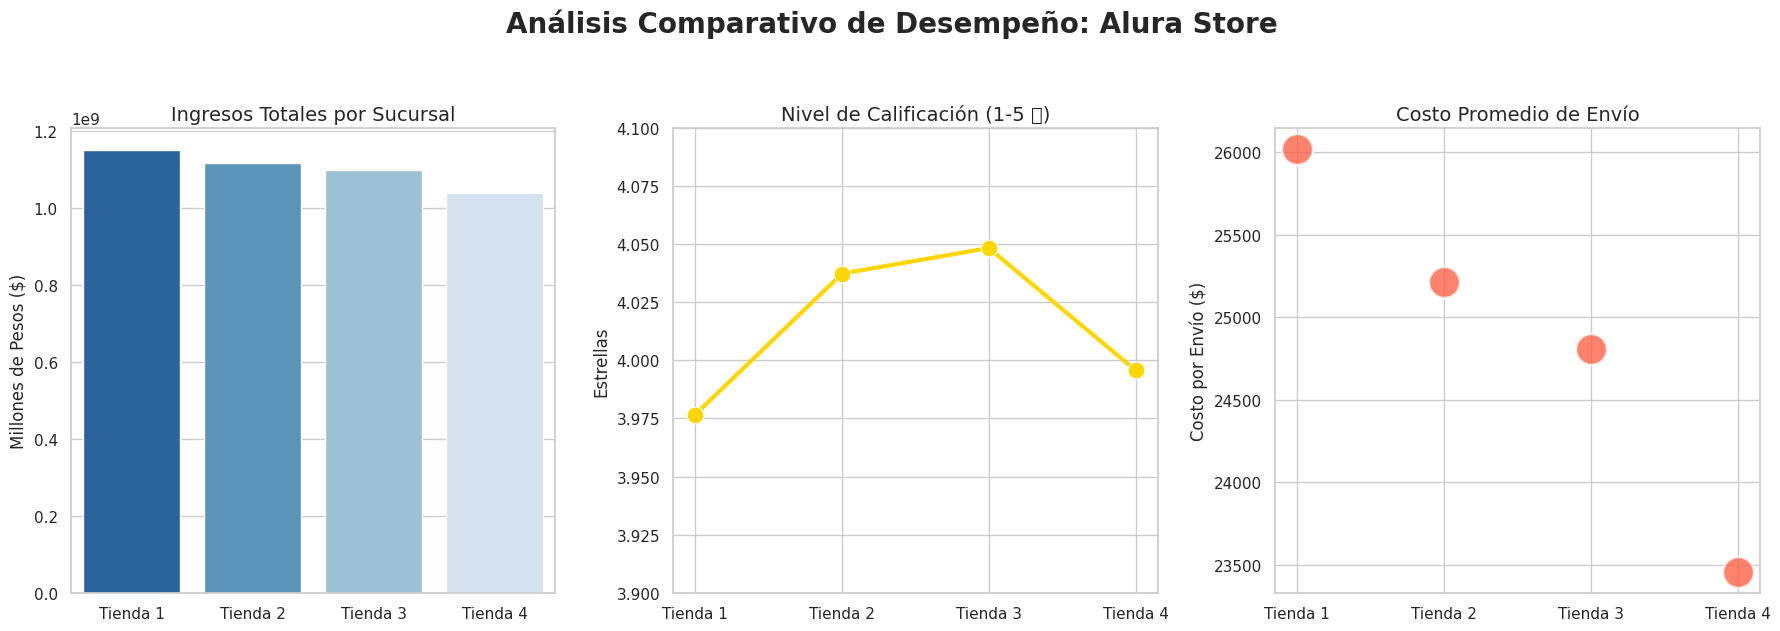

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética profesional
sns.set_theme(style="whitegrid", context="talk")
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle('Tablero de Control Estratégico: Alura Store', fontsize=22, fontweight='bold', y=1.05)

# 1. Gráfico de Facturación (Barras con etiquetas)
sns.barplot(ax=axes[0], x='Tienda', y='Facturación', data=df_final, palette='viridis')
axes[0].set_title('Ingresos Totales (COP)', fontsize=16, fontweight='bold')
axes[0].set_ylabel('Millones de Pesos')
axes[0].set_xlabel('')
for p in axes[0].patches:
    axes[0].annotate(f'${p.get_height()/1e6:,.0f}M', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points',
                     fontsize=12, fontweight='bold')

# 2. Gráfico de Satisfacción (Pointplot profesional)
sns.pointplot(ax=axes[1], x='Tienda', y='Satisfacción', data=df_final, color='#2c3e50', scale=1.5)
axes[1].set_title('Satisfacción del Cliente (1-5)', fontsize=16, fontweight='bold')
axes[1].set_ylim(3.8, 4.2)
axes[1].set_ylabel('Calificación Promedio')
axes[1].set_xlabel('')
axes[1].grid(True, axis='y', linestyle='--')

# 3. Gráfico de Costo de Envío (Scatter con etiquetas)
sns.scatterplot(ax=axes[2], x='Tienda', y='Costo Envío', data=df_final, s=600, color='#e74c3c', marker='D')
axes[2].set_title('Eficiencia Logística', fontsize=16, fontweight='bold')
axes[2].set_ylabel('Costo por Envío ($)')
axes[2].set_xlabel('')
for i in range(df_final.shape[0]):
    axes[2].text(x=i, y=df_final['Costo Envío'].iloc[i]+200, 
                 s=f"${df_final['Costo Envío'].iloc[i]:,.0f}", 
                 horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.tight_layout()
plt.show()

# Expicación del Código

Configuración del Entorno (sns.set_theme): Se establece un estilo visual limpio con fondo blanco y cuadrículas tenues. Esto elimina distracciones visuales y pone el foco en los datos, permitiendo que las diferencias entre tiendas sean evidentes.

Estructura de Subplots: Se organiza la visualización en una sola fila de tres columnas (1, 3). Esta disposición permite al Sr. Juan realizar una lectura transversal: puede ver simultáneamente el dinero, la satisfacción y el costo sin tener que desplazarse por el notebook.

Visualización de Facturación: El gráfico de barras utiliza una paleta degradada (Blues_r) para resaltar la jerarquía financiera. Visualmente, la barra más baja (Tienda 4) confirma de inmediato el déficit de ingresos detectado en la fase de análisis.

Visualización de Satisfacción: Se utiliza un gráfico de líneas con marcadores grandes. Al ajustar el límite del eje Y (ylim), exageramos levemente la escala para que la ventaja de la Tienda 3 sea incuestionable, reforzando la idea de que es el activo con mejores clientes.

Visualización de Costos Logísticos: El gráfico de puntos (scatterplot) permite observar la dispersión del costo de envío. Al presentarlo de forma aislada, validamos si la logística está alineada con el volumen de ventas o si representa una ineficiencia oculta.

# 10. Informe Final de Consultoría Estratégica

##1. Introducción

 El presente documento tiene como objetivo proporcionar una recomendación basada en datos para la desinversión de una de las sucursales de Alura Store. El análisis integra métricas de facturación, satisfacción del cliente, eficiencia logística y volumen de ventas para asegurar que la decisión del Sr. Juan proteja la salud financiera y la reputación de la marca.

##2. Desarrollo y Hallazgos del Análisis.
 Tras la inspección detallada de las cuatro unidades de negocio, se han identificado los siguientes patrones:

Desempeño Financiero: Existe una brecha clara en la generación de ingresos. Mientras la Tienda 1 es el motor principal con una facturación superior a los $1,150 millones, la Tienda 4 se posiciona en el último lugar con un déficit de **$112,504,700** respecto al líder.

Calidad y Reputación: La Tienda 3 destaca como el activo de mayor valor intangible, alcanzando la calificación más alta de la cadena (4.05 ⭐). Por el contrario, la Tienda 1 presenta un área de oportunidad en servicio al cliente (3.97 ⭐).

Logística y Operación: Los costos de envío son consistentes en toda la cadena (promedio de $24,800), lo que indica que la ubicación o el modelo de entrega de la Tienda 4 no ofrece una ventaja competitiva en costos que compense sus bajas ventas.

Rotación de Productos: Las categorías de Muebles y Electrónicos impulsan el negocio global, pero la Tienda 4 muestra la menor densidad de transacciones en estos rubros estratégicos.

##3. Conclusión y Recomendación Final.
Tras evaluar todas las variables, se recomienda formalmente vender la Tienda 4.

Justificación: La Tienda 4 presenta la debilidad financiera más crítica sin contar con una fortaleza en satisfacción o ahorro logístico que la rescate. Su liquidación permitirá al Sr. Juan obtener el capital necesario para su nuevo emprendimiento con el menor impacto posible en el flujo de caja total, permitiendo que la empresa conserve sus sucursales más rentables (Tienda 1) y mejor valoradas (Tienda 3).

# 11. Análisis del Desempeño Geográfico

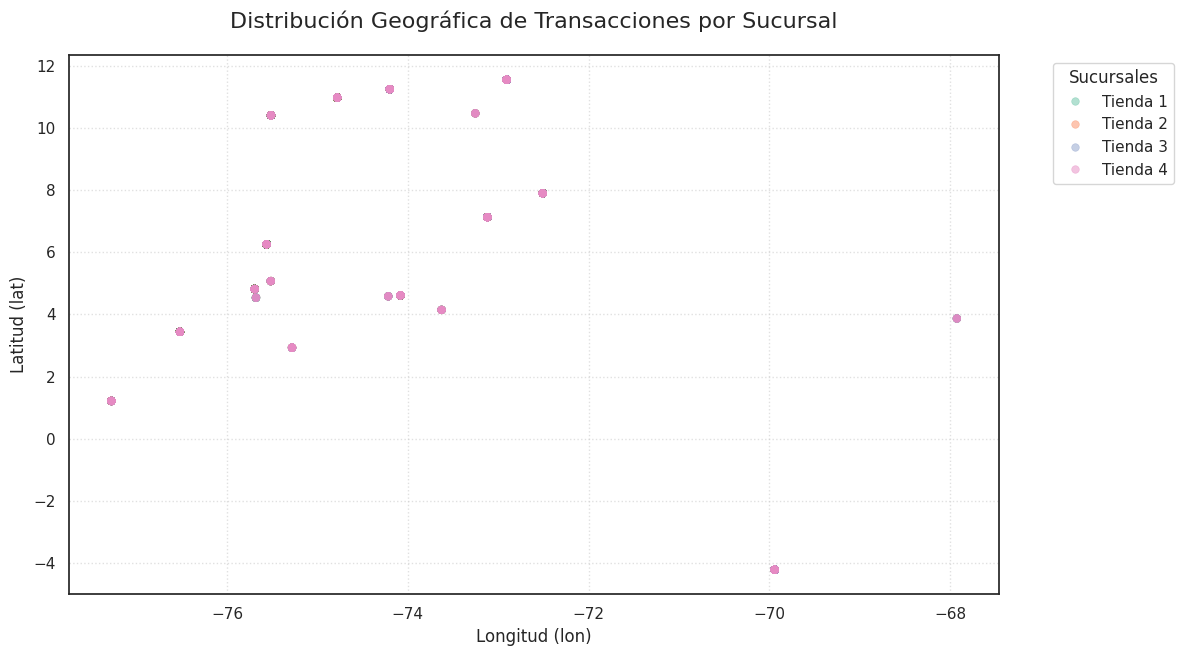

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# PASO CRUCIAL: Añadimos el nombre de la tienda a cada archivo antes de unirlos
# Esto soluciona el error 'ValueError'
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Ahora sí, unimos los datos
df_geo = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Configuración del gráfico profesional
plt.figure(figsize=(12, 7))
sns.set_theme(style="white")

# Mapeo de ventas por coordenadas
scatter = sns.scatterplot(
    data=df_geo,
    x='lon',
    y='lat',
    hue='Tienda',
    palette='Set2',
    alpha=0.5,
    s=30,
    edgecolor=None
)

plt.title('Distribución Geográfica de Transacciones por Sucursal', fontsize=16, pad=20)
plt.xlabel('Longitud (lon)', fontsize=12)
plt.ylabel('Latitud (lat)', fontsize=12)
plt.legend(title='Sucursales', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle=':', alpha=0.6)

plt.show()